In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import pickle

In [7]:
df = pd.read_csv("./processed_data.csv")
df.head()

,text,label
0,feel rather rotten ambitious right,sadness
1,update blog feel shitty,sadness
2,never make separate ever want feel like ashamed,sadness
3,leave bouquet red yellow tulips arm feel sligh...,joy
4,feel little vain one,sadness


In [8]:
#Spliting data values and target values
x = df['text']
y = df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split (x,y, test_size=0.33, random_state=1)

### Count Vectorizer

In [10]:
# Create a CountVectorizer to convert text into a numerical representation and removing stop words
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

### Checking for all the classifiers

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import f1_score

In [12]:
classifiers = [
    KNeighborsClassifier(15),
    SVC(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    SGDClassifier(),
    MultinomialNB()
]

In [13]:
classifier_names = []
f1_scores = []

for clf in classifiers:
    clf.fit(X_train_vectorized, y_train)
    pred=clf.predict(X_test_vectorized)

    f1 = f1_score(y_test, pred, average='weighted')

    classifier_names.append(str(clf))
    f1_scores.append(f1)
    
    print(clf, f1)

KNeighborsClassifier(n_neighbors=15) 0.5251640323779103
SVC() 0.8176668008357247
DecisionTreeClassifier() 0.8117805463811243
ExtraTreesClassifier() 0.873680777324465
RandomForestClassifier() 0.866907097166342


c:\Users\Soumya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier() 0.20817921607709883
SGDClassifier() 0.8654622150861118
MultinomialNB() 0.7402589696001602


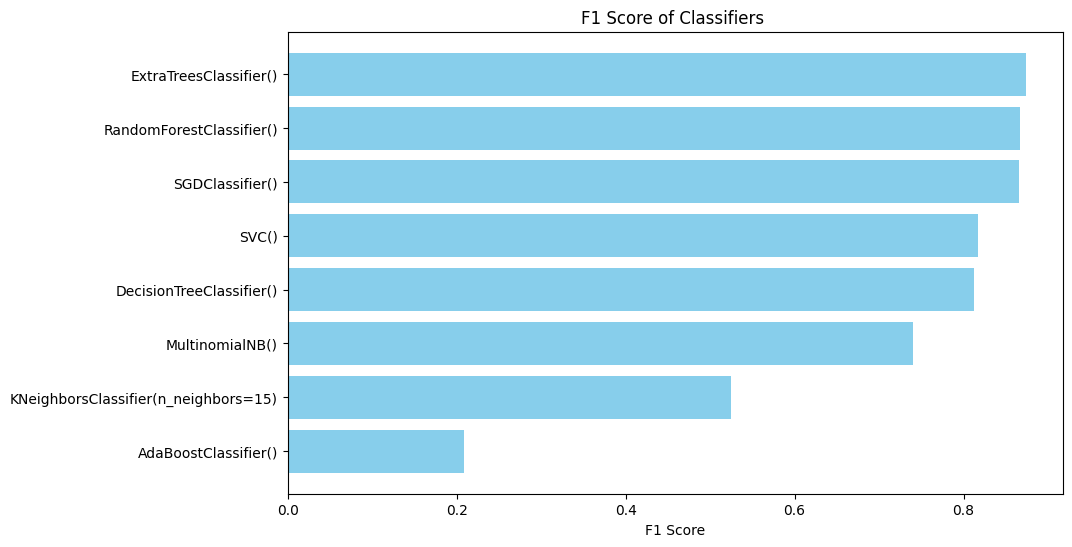

In [14]:
sorted_results = sorted(zip(classifier_names, f1_scores), key=lambda x: x[1], reverse=True)
sorted_classifier_names, sorted_f1_scores = zip(*sorted_results)

plt.figure(figsize=(10, 6))
plt.barh(sorted_classifier_names, sorted_f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score of Classifiers ')
plt.gca().invert_yaxis() 
plt.show()

### Extra Trees Classifier - 0.877

In [15]:
etc = ExtraTreesClassifier()
etc.fit(X_train_vectorized, y_train)
y_pred = etc.predict(X_test_vectorized)
accuracy = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)

Accuracy: 0.8720051815633048


In [16]:
from sklearn.metrics import classification_report

y_pred = etc.predict(X_test_vectorized)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

       anger       0.87      0.87      0.87       877
        fear       0.84      0.85      0.85       792
         joy       0.90      0.89      0.89      2211
        love       0.80      0.73      0.76       558
     sadness       0.90      0.91      0.91      1912
    surprise       0.67      0.81      0.73       250

    accuracy                           0.87      6600
   macro avg       0.83      0.84      0.84      6600
weighted avg       0.87      0.87      0.87      6600



In [17]:
# etc = ExtraTreesClassifier(min_samples_split=5)
# etc.fit(X_train_vectorized, y_train)
# y_pred = etc.predict(X_test_vectorized)
# accuracy = f1_score(y_test, y_pred,average='weighted')
# print("Accuracy:", accuracy)

#### Hyperparameter Tuning

In [18]:
# from sklearn.model_selection import GridSearchCV

# etc = ExtraTreesClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, scoring='f1_weighted')

# grid_search.fit(X_train_vectorized, y_train)

# print("Best Parameters:", grid_search.best_params_)

# best_etc = grid_search.best_estimator_

# y_pred = best_etc.predict(X_test_vectorized)

# accuracy = f1_score(y_test, y_pred, average='weighted')
# print("Best Model Accuracy:", accuracy)

### SGD Classifier- 0.8755

In [19]:
sgd = SGDClassifier(alpha = 0.001, loss =  'modified_huber', max_iter =  1000, penalty = 'elasticnet')
sgd.fit(X_train_vectorized, y_train)
y_pred = sgd.predict(X_test_vectorized)
accuracy = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)

Accuracy: 0.8731563426467223


In [20]:
from sklearn.metrics import classification_report

y_pred = sgd.predict(X_test_vectorized)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       anger       0.89      0.85      0.87       877
        fear       0.85      0.84      0.85       792
         joy       0.87      0.93      0.90      2211
        love       0.85      0.65      0.73       558
     sadness       0.91      0.93      0.92      1912
    surprise       0.73      0.72      0.73       250

    accuracy                           0.88      6600
   macro avg       0.85      0.82      0.83      6600
weighted avg       0.87      0.88      0.87      6600



In [21]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDClassifier

# # Instantiate SGDClassifier
# sgd = SGDClassifier()

# # Define the parameter grid
# param_grid = {
#     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],  # Loss function
#     'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
#     'penalty': ['l2', 'l1', 'elasticnet'],  # Penalty term
#     'max_iter': [1000, 1500, 2000],  # Maximum number of iterations
# }

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, scoring='f1_weighted')

# # Fit the grid search to the data
# grid_search.fit(X_train_vectorized, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_sgd = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_sgd.predict(X_test_vectorized)

# # Calculate accuracy
# accuracy = f1_score(y_test, y_pred, average='weighted')
# print("Best Model F1 Score:", accuracy)


#### Hyperparameter Tuning

In [22]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# etc = ExtraTreesClassifier()

# param_dist = {
#     'n_estimators': randint(50, 200),
#     'max_depth': [None] + list(np.random.randint(1, 50, 10)),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 20),
# }

# random_search = RandomizedSearchCV(estimator=etc, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)

# random_search.fit(X_train_vectorized, y_train)

# print("Best Parameters:", random_search.best_params_)

# best_etc = random_search.best_estimator_

# y_pred = best_etc.predict(X_test_vectorized)

# accuracy = f1_score(y_test, y_pred, average='weighted')
# print("Best Model Accuracy:", accuracy)

### Random Forest Classifier - 0.872

In [23]:
# rfc = RandomForestClassifier()
# rfc.fit(X_train_vectorized, y_train)
# y_pred = rfc.predict(X_test_vectorized)
# accuracy = f1_score(y_test, y_pred,average='weighted')
# print("Accuracy:", accuracy)

In [24]:
rfc = RandomForestClassifier(min_samples_split=15)
rfc.fit(X_train_vectorized, y_train)
y_pred = rfc.predict(X_test_vectorized)
accuracy = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)

Accuracy: 0.8687297871009867


In [25]:
rfc = RandomForestClassifier(min_samples_split=15)
rfc.fit(X_train_vectorized, y_train)
y_pred = rfc.predict(X_test_vectorized)
accuracy = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)

Accuracy: 0.8678132133275472


### Predicting

In [26]:
new_text_entry = "Im having a very good time!! but i think the overall experience is slightly tragic, dont you think?"

new_text_entry_vectorized = vectorizer.transform([new_text_entry])

predicted_class = etc.predict(new_text_entry_vectorized)

print("Predicted Class:", predicted_class)

Predicted Class: ['sadness']


In [27]:
new_text_entry = "I am very scared for the exams. I fear they wont go good"

new_text_entry_vectorized = vectorizer.transform([new_text_entry])

predicted_class = etc.predict(new_text_entry_vectorized)

print("Predicted Class:", predicted_class)

Predicted Class: ['joy']


Confusion Matrix:
[[ 763   21   24    4   61    4]
 [  33  671   14    2   40   32]
 [  36   31 1978   65   60   41]
 [   8    7  143  386   14    0]
 [  58   39   61    7 1732   15]
 [   1   37    5    1    6  200]]

Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.87      0.86       877
        fear       0.83      0.85      0.84       792
         joy       0.89      0.89      0.89      2211
        love       0.83      0.69      0.75       558
     sadness       0.91      0.91      0.91      1912
    surprise       0.68      0.80      0.74       250

    accuracy                           0.87      6600
   macro avg       0.83      0.83      0.83      6600
weighted avg       0.87      0.87      0.87      6600



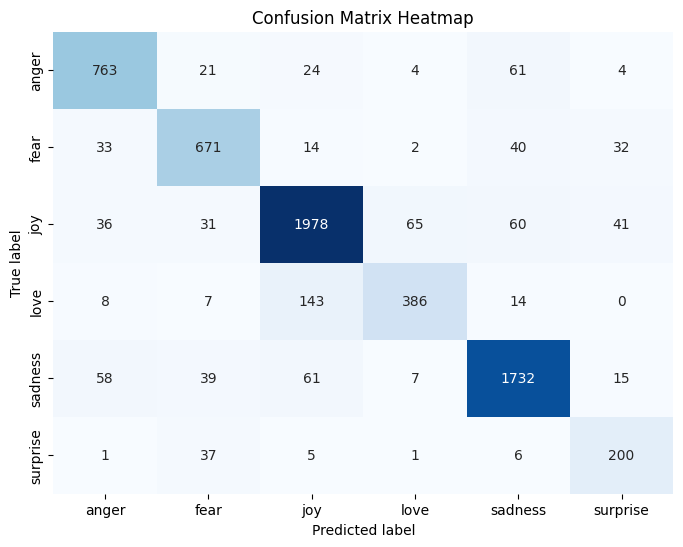

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score using classification_report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [29]:
input_text = "i am feeling pretty wonderful. But yesterday was a little sad, with the weather being so terrible. I'm surprised its the not the same today"
sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', input_text)

# Create a dictionary to store emotion counts
emotion_count = {'anger': 0, 'fear': 0, 'sadness': 0, 'love': 0, 'joy': 0 , 'surprise':0}  

# Process each sentence
for sentence in sentences:
    # Preprocess the sentence (optional, depending on your data)
    # processed_sentence = preprocess_function(sentence)

    # Transform the sentence
    sentence_vectorized = vectorizer.transform([sentence])

    # Predict emotion for the sentence
    emotion_prediction = etc.predict(sentence_vectorized)[0]

    # Update the emotion count
    emotion_count[emotion_prediction] += 1
    # print(sentence, emotion_prediction)

# Print the results
for emotion, count in emotion_count.items():
    print(f"{emotion}: {count}")

anger: 1
fear: 0
sadness: 1
love: 0
joy: 1
surprise: 0


### Make a Pickle File

In [30]:
# Dumping vectorizer as Pickle

with open('../../App/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [31]:
with open('../../App/model.pkl', 'wb') as file:
    pickle.dump(etc, file)